## Playment Assignment - Painting Segmentation

Assignment link: https://www.notion.so/playment/Playment-ML-Engineer-Assignment-Segmentation-04bbcb8c4b474603829e531aa5fbe852

**Approach**: 
To use Detectron2's "Panoptic Segmentation" model to apply panoptic image segmentation on Bob Ross paintings

## **Requirements**

In [1]:
#Install detectron2
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [2]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")   # please manually install torch 1.8 if Colab changes its default version

1.8.0+cu101 True


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries like numpy, json, cv2 etc.
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Original Image of train/painting40.png
file train/painting40.png does not exist
Original Image of train/painting41.png


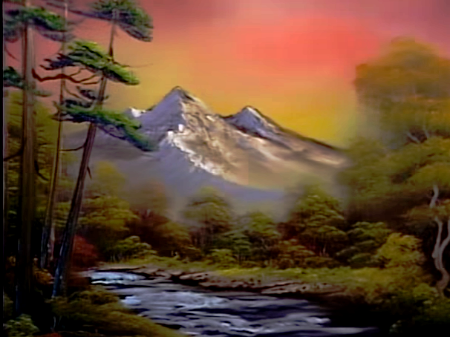

Segmented Image of train/painting41.png


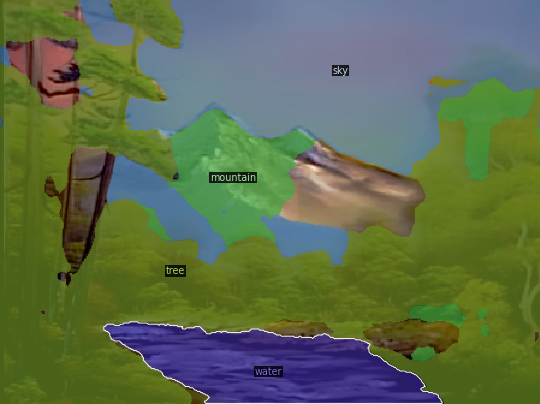

Original Image of train/painting42.png


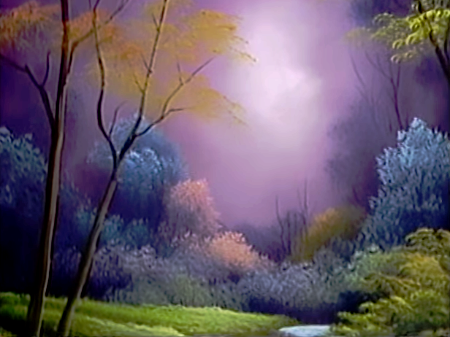

Segmented Image of train/painting42.png


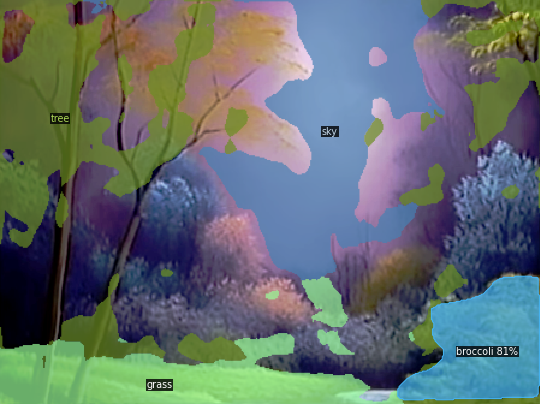

Original Image of train/painting43.png
file train/painting43.png does not exist
Original Image of train/painting44.png


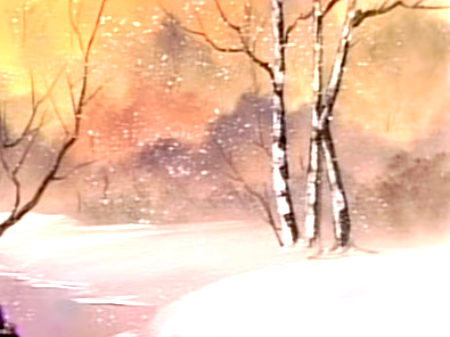

Segmented Image of train/painting44.png


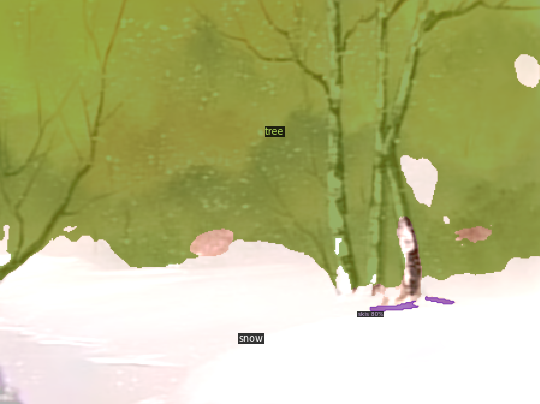

Original Image of train/painting45.png


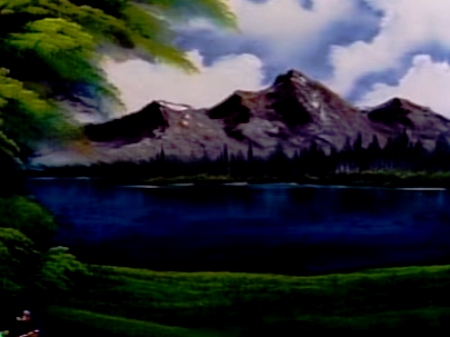

Segmented Image of train/painting45.png


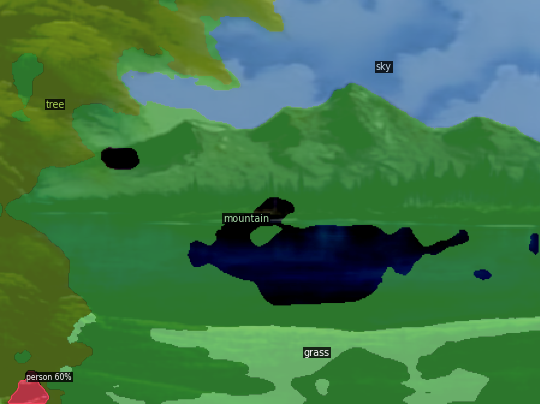

Original Image of train/painting46.png
file train/painting46.png does not exist
Original Image of train/painting47.png
file train/painting47.png does not exist
Original Image of train/painting48.png


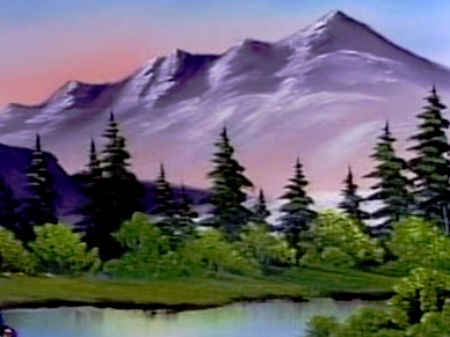

Segmented Image of train/painting48.png


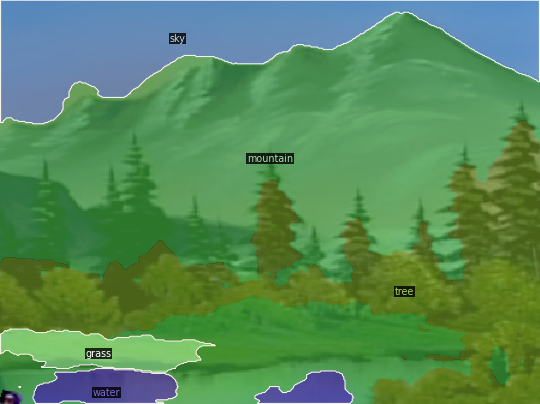

Original Image of train/painting49.png


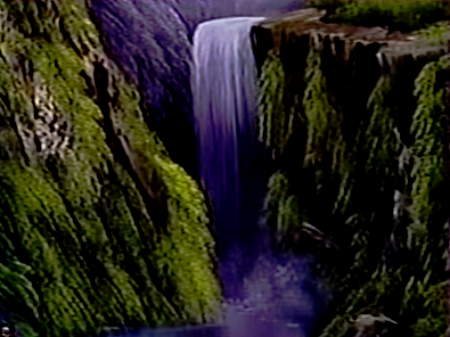

Segmented Image of train/painting49.png


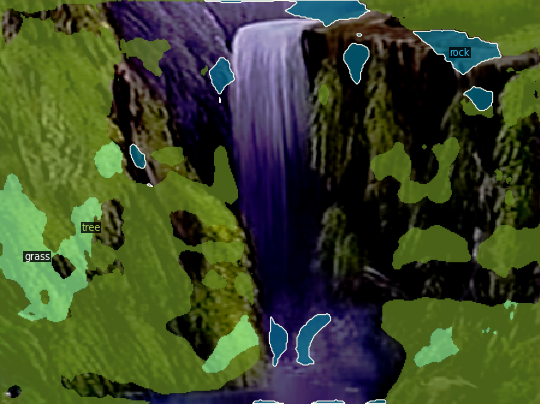

Original Image of train/painting50.png
file train/painting50.png does not exist


In [12]:
for i in range(40,51):
  try:
    filename = "train/painting" + str(i) + ".png"
    im = cv2.imread(filename)
    print("Original Image of {}".format(filename))
    cv2_imshow(im)
    # Inference with a panoptic segmentation model
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
    predictor = DefaultPredictor(cfg)
    panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
    print("Segmented Image of {}". format(filename))
    cv2_imshow(out.get_image()[:, :, ::-1])
  except:
    print("file {} does not exist".format(filename))
